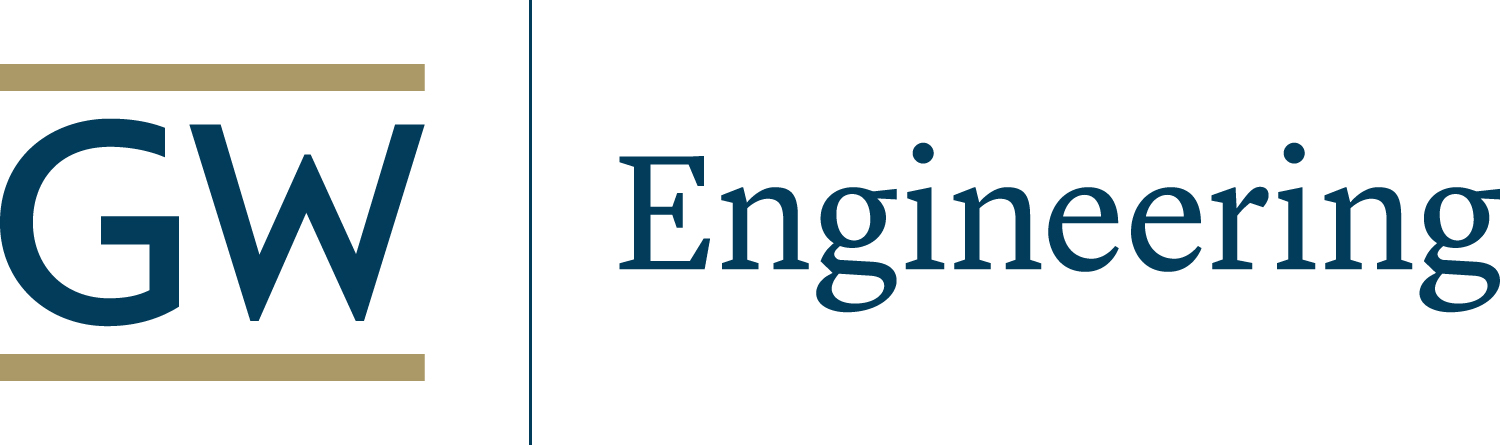

# **Homework 6**

# Securing Containerized Microservices

In [60]:
# Author:   Christian Djachechi
# Email:    christiand@gwu.edu
# Created Date: 5/07/2025
# Last Modified :5/07/2025

## Assignment Overview
In this assignment, you will assume the role of a **cybersecurity architect** tasked with securing a vulnerable containerized application. 
You will receive an intentionally insecure multi-service Python web app and must transform it into a secure deployment. The exercise includes 
environment setup, code remediation, threat modeling, security architecture design, and verification. Your deliverables will include a screen 
recording of your analysis and remediation process, along with a technical report.

## Part 1: Environment Setup

1. **Understand the Application:**

### Understanding the Application: Security Vulnerabilities

The Flask application contains multiple security vulnerabilities that expose it to potential malicious attacks. These issues must be addressed to ensure the application is secure and resilient against common web threats.



#### Vulnerability #1.  Hardcoded password via `PASSWORD = `

A plaintext, non-encrypted password is present in the source code. This poses a serious security risk as attackers with access to the codebase can easily obtain sensitive credentials.

##### Summary
``` text
    Vulnerability: Hardcoded Password
    Location:      PASSWORD =
    Severity:      Critical
    Status:        Not Fixed
    
    Potential Impact:
    -  Exposure of authentication
    -  No encryption 


 

#### Vulnerability #2:  Code Injection via `eval()` 

The `eval()` function will execute any parameters passed into it,allowing remote code execution if user input is not sanitized.

##### Summary
``` text
    Vulnerability: Code injection
    Location:      /calculate route
    Severity:      Critical
    Status:        Not Fixed
    
    Potential Impact:
    -  Remote Code execution
    -  Data Manipulation






#### Vulnerability #3.  Insecure Configuration

The web application is listening on all IP addresses `(0.0.0.0)` without using TLS/HTTPS. This allow the communication to be intercepted between the Client and Server, hence vulnerable to eavesdropping.

##### Summary
``` text
    Vulnerability: Code injection
    Location:      app.run()
    Severity:      Critical
    Status:        Not Fixed
    
    Potential Impact:
    - Data interception 
    - Man-in-the-middle (MiM)
    - Lack of encryptions 


#### Vulnerability #4.  Command Injection in `/ping` Route

Un-sanitized user input into this subprocess call withe the Shell=True will allow an attacker to inject arbitrary commands and compromise the system.

##### Summary
``` text
    Vulnerability: Code injection
    Location:      shell=True
    Severity:      Critical
    Status:        Not Fixed
    
    Potential Impact:
    -  Remote Code execution
    -  System compromise



### Run the Environment

Under the current unsecured configuration, we will run the application source code (App.py) and Dockerfiles using `make start` or ` docker-compose up` commands.  
`docker ps` and `docker inspect` will be use to map the architecture.



make start


![Screenshot 2025-05-08 at 8.15.23 PM.png](<attachment:Screenshot 2025-05-08 at 8.15.23 PM.png>)
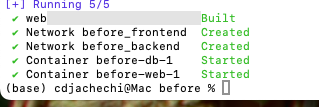

Ping  home
http://localhost:15000/

![Screenshot 2025-05-08 at 8.22.31 PM.png](<attachment:Screenshot 2025-05-08 at 8.22.31 PM.png>)

* **Results**: Successfull connection to application home on port 15000
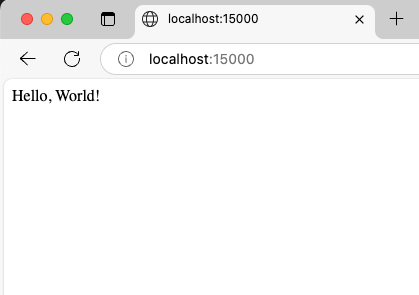

Testing the Ping Endpoint


http://localhost:15000/ping?ip=8.8.8.8

![Screenshot 2025-05-08 at 8.24.17 PM.png](<attachment:Screenshot 2025-05-08 at 8.24.17 PM.png>)

* **Note**: Pinging google
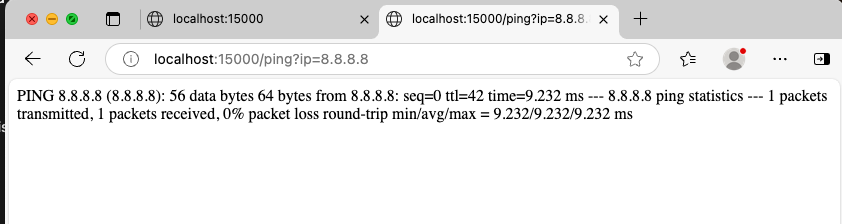

http://localhost:15000/calculate?expr=2%2B3

![Screenshot 2025-05-08 at 8.27.43 PM.png](<attachment:Screenshot 2025-05-08 at 8.27.43 PM.png>)


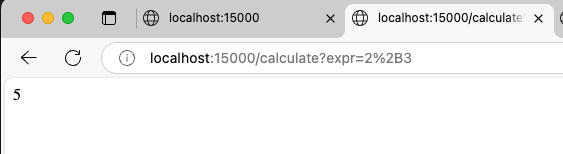

* **Note**: 

Malicious input

![Screenshot 2025-05-08 at 8.35.02 PM.png](<attachment:Screenshot 2025-05-08 at 8.35.02 PM.png>)

* **Note**: Another ping to google , but inserted a command to list root directory (ls)
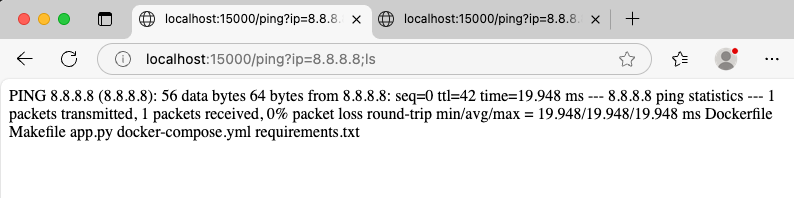

### Initial Security Scanning

Static code  analysis with `make check`

|

#### Total Issues (by Severity)

| Severity   | Count | FIndings|
|------------|-------|---------|
| Undefined  | 0     |         |
| Low        | 2     | CWE: CWE-259 , CWE: CWE-78 |       |
| Medium     | 2     |  CWE: CWE-605|
| High       | 1     |CWE: CWE-78 |

#### Total Issues (by Confidence)

| Confidence | Count |
|------------|-------|
| Undefined  | 0     |
| Low        | 0     |
| Medium     | 2     |
| High       | 3     |

* **Endpoints Security Findings**: 
1.  CWE-78: OS Command Injection   :  CWE-78 (https://cwe.mitre.org/data/definitions/78.html) : Issue: [B404:blacklist]
2.  CWE-95: Eval Injection in /calculate endpoint
3.  CWE-259: Use of Hard-coded Credentials   : CWE-259 (https://cwe.mitre.org/data/definitions/259.html)      : Issue: [B105:hardcoded_password_string] P
5.  CWE-605 : Binding to all interfaces : CWE: CWE-605 (https://cwe.mitre.org/data/definitions/605.html) | Issue: [B104:hardcoded_bind_all_interfaces]



Scanning for dependancies/ Container `make scan`



 * **OUTPUT** | `make scan > container-security-results.txt 2>&1  `

![Screenshot 2025-05-08 at 9.28.18 PM.png](<attachment:Screenshot 2025-05-08 at 9.28.18 PM.png>)
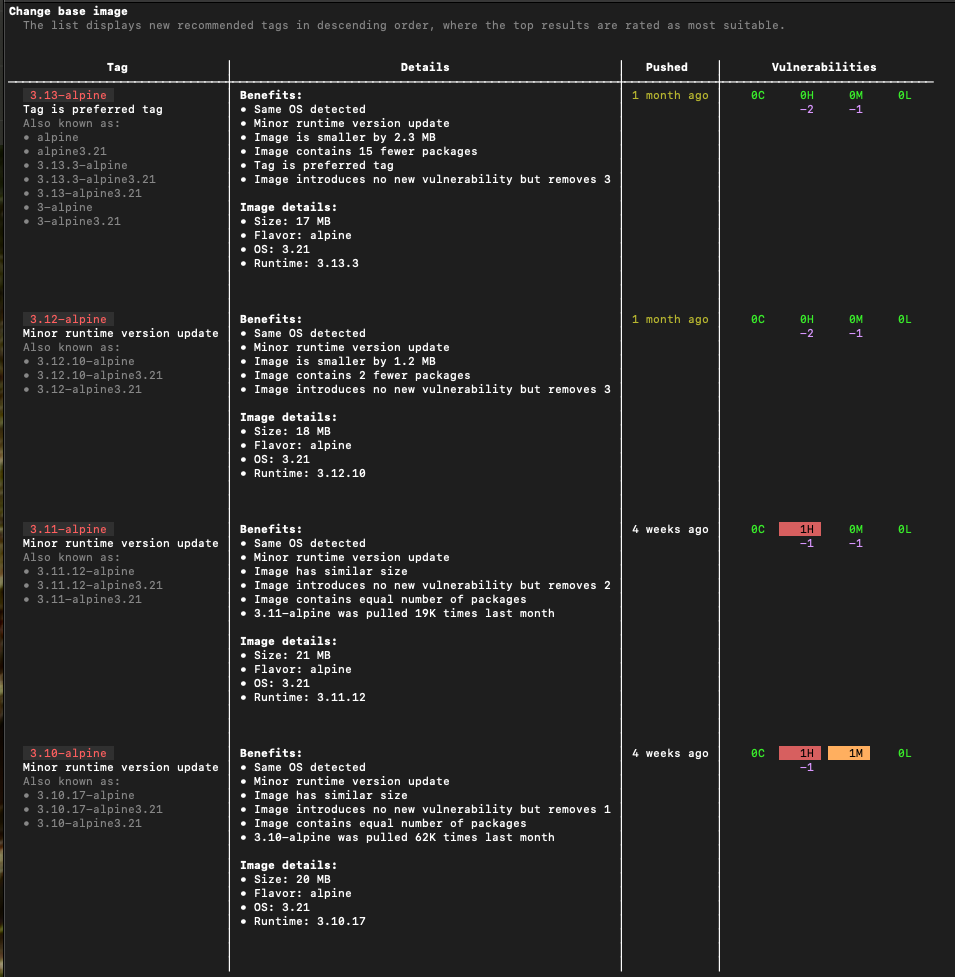

* **Note**: The scan is evaluating different Alpine Linux base images in the App container, comparing vulnerabilities and suggesting the that  most suitable versions  
              is  3.13-alpine: Smaller image and do not introduce any new vulnerability while removing 3 existing ones.

Host security configuration with `make host-security`



**OUTPUT** | ` make host-security > host-security-results.txt 2>&1`

#### Security  Audit Summary

The output shows results from running this web applications shows some critical vulnerabilities such as command code injection and code execution vulnerabilities,hardcoded password and insufficient input validation and configurations. Our next task is to apply some security remediation and secured the deployment.



## Part 2: Secure the App and Container

To fix the vulnerabilities in this app  we will:

-   Remove hardcorded credentials
-   Sanitize and validate all user inputs
-   Avoid dangerous functions like eval() and call for shell
-   Enforce binding the application to specific interface 
-   Add Logging
-   Update the container configuration
-   Modify  host security code to work on Mac
  
  We can not address all the vulnerabilities in the docker configurations and the web applications, but we will improve it.
  - Docker-compose code
  - App.py
  - docker_fixes_mac.py

Changing folter to after and stard the docker application
now we expect to see be able to ping but not able to run( inject any other commands)



Maliciuous Ping and embended ls command

![Screenshot 2025-05-08 at 10.20.28 PM.png](<attachment:Screenshot 2025-05-08 at 10.20.28 PM.png>)
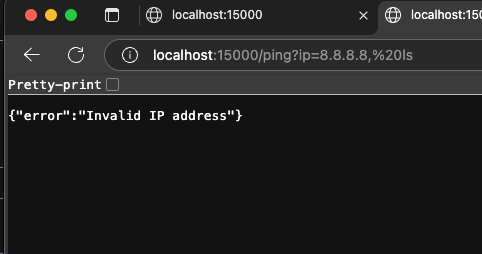

* **Note** : Expected result as we are now sanitizing and validating all user input`

![Screenshot 2025-05-08 at 10.24.22 PM.png](<attachment:Screenshot 2025-05-08 at 10.24.22 PM.png>)
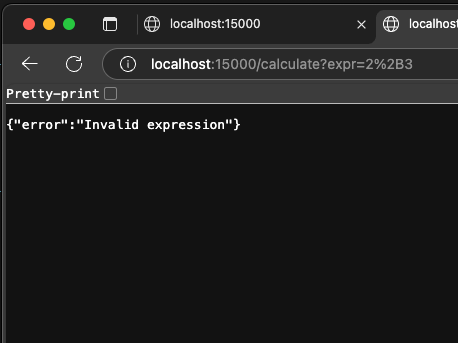

comparaison to non secure results

### Issue Comparison: Previous vs. New ( After security patch)

###  Issues Counts FOR BEFORE AND AFTER Security patches

| Category     | Severity-BEFORE | Severity-AFTER | Confidence-BEFORE | Confidence-AFTER     | 
|--------------|-----------------|----------------|-------------------|----------------------|
| Undefined    | 0               |            0    |0                 |0                     |
| Low          | 2               |           7     | 0                |0                 |
| Medium       | 2               |          2      | 2                 |2      |
| High         | 1               |         0       | 3               |7 |




---

### Summary of Changes

- **Low severity issues increased** from **2 to 7**
- **High severity issues decreased** from **1 to 0**
- **Medium severity issues remained the same (2)**
- **Medium confidence issues stayed at 2**
- **High confidence issues increased** from **3 to 7`**

make scan - After

![Screenshot 2025-05-08 at 10.50.18 PM.png](<attachment:Screenshot 2025-05-08 at 10.50.18 PM.png>)
docker_fixes_mac.py
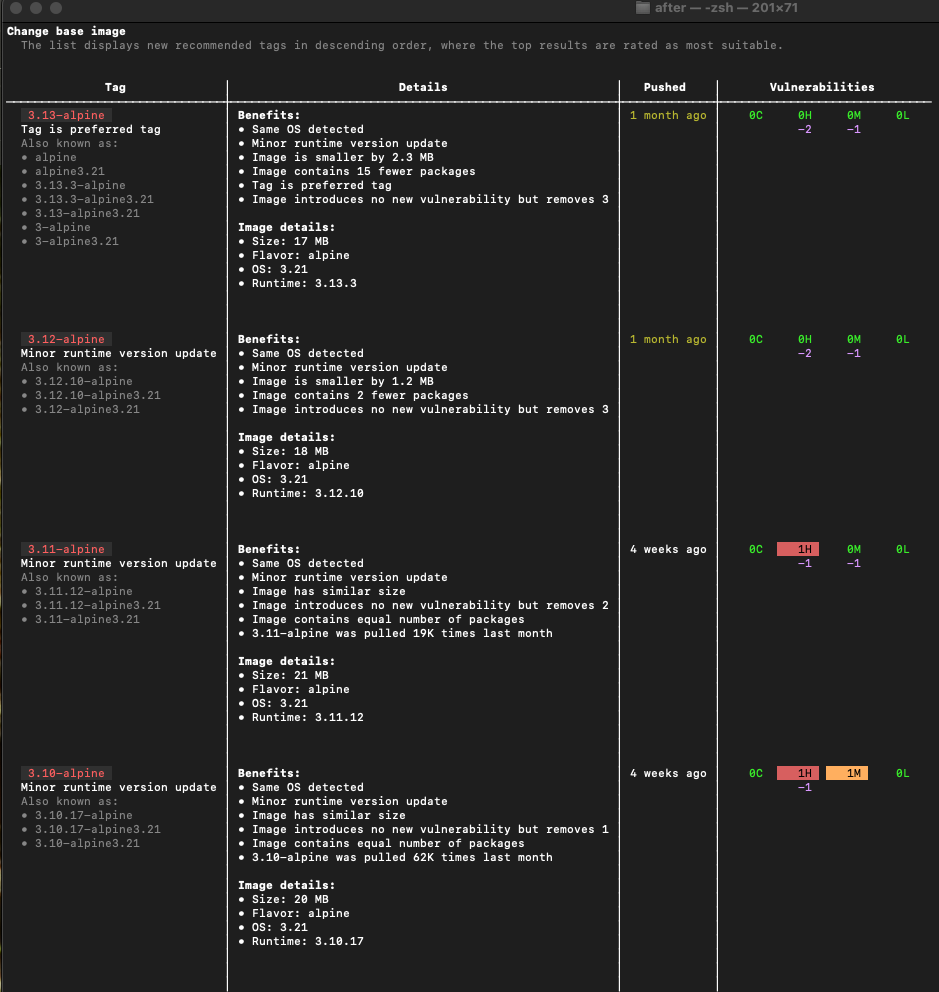

#### Applying  docker_fixes_mac.py
Needed to fix issue affecting Docker on MAC: The secure host scripts is trying to modify /etc/docker/daemon.json, but that directory doesn't exist or you don't have permission to write to it, hence a modification is needed for the docker-compose file.
- Skip the daemon.json update on macOS
- Still apply the Docker container security enhancements to your Dockerfile
- Still update your docker-compose.yml with security setting
- Run python docker_fixes_mac.py
- Run DOCKER_CONTENT_TRUST=0 make host-security > security_report_improved.txt



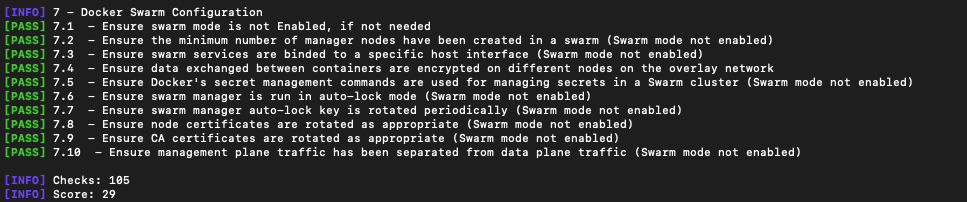

We got a better result from a score of 6 to 25 , showing a substantial improvement in Container Runtime,Docker daemon configurations and host configur`ation.

## Part 3: Threat Modeling

### 1. Overview

This document outlines the threat modeling exercise performed on the initial insecure application, utilizing both the STRIDE and MITRE ATT&CK methodologies to systematically identify, categorize, and assess potential security threats. 


- External Attackers: Could try to exploit vulnerabilities in the web application or the underlying infrastructure to gain unauthorized access, execute arbitrary code, or cause denial of service.
- Network Attacks: Potential for network sniffing or man-in-the-middle attacks if communication isn't properly secured.
- Container misconfigurations could potentially lead to container escape.
- Database Compromise: If the database credentials or network are not secured, an attacker could potentially access or modify sensitive data.

---

### 2.  STRIDE Analysis

| Threat Category | Example | Threat | Mitigation | Risk | Impact|
|----------------|---------|--------|------------|-------|-------|
| Spoofing        | Lack of auth on `/calculate` | Unauthorized access,Weak password policy | Add auth/token check | High | High|
| Tampering       | Unsafe IP input to `ping` | Command injection, malicious code during build/deploy | Input validation | Critical | Critical|
| Repudiation     | No logging | Difficult to audit usage | Implement access logs | High | Medium|
| Information Disclosure | Hardcoded passwords | Credential leak | Use env variables | Critical | Critical!
| Denial of Service | Unrestricted `ping` or `eval` | Resource exhaustion | Rate limiting | High | High|
| Elevation of Privilege | Runs as root , Shell Access| Full system compromise | Use non-root user | Critical | Critical|

-----

### 3. MITRE ATT&CK Mapping (Containers)

| Tactic         | Technique ID | Technique Name | Application Relevance |   Risk  | Impact | Mitigation |
|----------------|--------------|----------------|------------------------|---------|--------|-----------|
| Initial Access | T1190         | Exploit Public-Facing Application | Command injection in `/ping` | High | High | Input validation,Rate limiting,API gateway|Patch|
| Execution      | T1059         | Command and Scripting Interpreter | Use of `eval()` | High | High | Input sanitization |
| Persistence    | T1525         | Implant Container Image | No image signing or validation | Critical | Critical| Image signing and validation: Docker Scout,Trivy|
| Privilege Escalation | T1611  | Escape to Host | Root container user | High | High| Container security policies, segmentation|
| Defense Evasion | T1211        | Exploitation for Defense Evasion | Lack of file system isolation | Medium| Medium | Patching,Application hardening,Least Privilege,segmentation| 
| Credential Access | T1552 | Credentials in Files | Unauthorized access, Credential in code| High | High| Secure secret management (KMS) |
| Collection  | T1005 | Data from Local System | Access to local files| High | High | Data protection, Segmentation, Least Privilege|


---

### 4. Controls Mapping (NIST 800-53)

| Issue | Recommended Control | Framework Reference |
|-------|---------------------|---------------------|
| Hardcoded secrets | Environment secrets | NIST 800-53: SC-12, SC-28 |
| Root container user | Add `USER appuser` | NIST 800-53: AC-6, CM-6 |
| No network restrictions | Isolate with Docker networks | NIST 800-53: SC-7 |
| Missing health check | Add `HEALTHCHECK` | CIS Docker Benchmark |
| Unvalidated inputs | Strict input validation | OWASP Top 10: A1-Injection |
| Logging Monitoring| Automated log analysis | AU-6,SI-4|

_______

### 5. Risk Rating Summary

| Threat | Risk | Likelihood | Impact | Mitigation Priority |
|--------|------|------------|--------|----------------------|
| Command Injection | High | High | Critical | Immediate |
| Credential Exposure | Medium | High | Medium | High |
| Eval-based execution | High | Medium | High | Immediate |
| Root user in container | High | Medium | Critical | Immediate |
| No input validation | Critical | Medium | High | Immediate|
| No logging | High | Medium | Medium | High|


### 6. Conclusion

This threat model identifies the major flaws in the system and informs the remediation and architecture redesign. The final implementation significantly reduces the attack surface ,eliminates root access and enforces least privilege, defense in depth, secure defaults , and logging and monitoring.
By applying STRIDE, we analyze the application for Spoofing, Tampering, Repudiation, Information Disclosure, Denial of Service, and Elevation of Privilege risks. The MITRE ATT&CK framework is used to map real-world adversarial techniques relevant to containerized environments, providing a comprehensive view of possible attack vectors. This approach enables us to prioritize risks, recommend effective mitigations, and guide the secure redesign of the application architecture.

### Security Vulnerabilities Analysis

#### 1. Hard-coded Password (`PASSWORD = "supersecretpassword"`)

**Threats:** Information Disclosure, Privilege Escalation

**Explanation:** The password is visible in plain text in the source code. Anyone with access to the code (including code repositories or container images) can see this password and potentially use it to access protected systems.

---

#### 2. Command Injection (`/ping` endpoint)

**Threats:** System Compromise, Data Loss, Service Disruption

**Explanation:** The `/ping` endpoint directly inserts user input into a shell command without validation:
```python
subprocess.check_output(f"ping -c 1 {ip}", shell=True)

#### 3. Command Injection (`/calculate` endpoint)

**Threats:** Full System Control, Data Access, System Destruction

**Explanation:** The `/calculate` endpoint directly inserts user input into a shell command without validation:
```python
subprocess.check_output(f"eval()

## Part 4: Security Architecture Implementation

Remediating the code is crucial, but securing the application also involves the environment it runs in. Since this is a containerized application we will not address every potential security flaws, but will focus on the applications.
- Minimal Base Images: Use minimal, official base images for your Dockerfile (e.g., python:3.9-alpine). Smaller images reduce the attack surface by including fewer libraries and tools.
- Non-Root User: This will limits the damage and attacker can do if the system is compromise, but we are in a lab.

- Network Segmentation:The web container should only be able to communicate with the database on the backend network, and external access should only be on the web container's exposed port. Using a proxy here will provided the right segmentation: Firewalls, Proxies,API Gateway.

- Least Privilege:  We should ensure this user has only the necessary permissions within the container: Role based access control (RBAC)

- Input Validation and Sanitization: All user inputs should be carefully validated and sanitized to prevent various injection attacks: Reverse Proxy, API gateway

- Secure Secrets Management: Hardcoding secrets like database credentials in docker-compose.yml is not ideal for production. We should explore using Docker Secrets or a dedicated secrets management solution: KMS, Hashicorp Vault, AWS secrets manager
- Regular Vulnerability Scanning: The Makefile includes scan using docker scout. This is crucial and should be integrated into the CI/CD pipeline: Scoutsuite, Trivy

- Logging and Monitoring: Implementing proper logging and monitoring will help detect and respond to security incidents: 

- Secure Communication: For production deployments, HTTPS should be enforced to encrypt communication between the client and the web application.

In [8]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
from diagrams import Diagram, Edge, Cluster
from diagrams.onprem.network import Internet, Apache, Nginx
from diagrams.aws.security import FirewallManager, ShieldAdvanced, IAMPermissions
from diagrams.k8s.compute import ReplicaSet, Pod 
from diagrams.onprem.database import MySQL, PostgreSQL
from diagrams.onprem.container import Docker
from diagrams.generic.network import Firewall, Subnet
from diagrams.k8s.clusterconfig import HPA
from diagrams.k8s.controlplane import ControllerManager



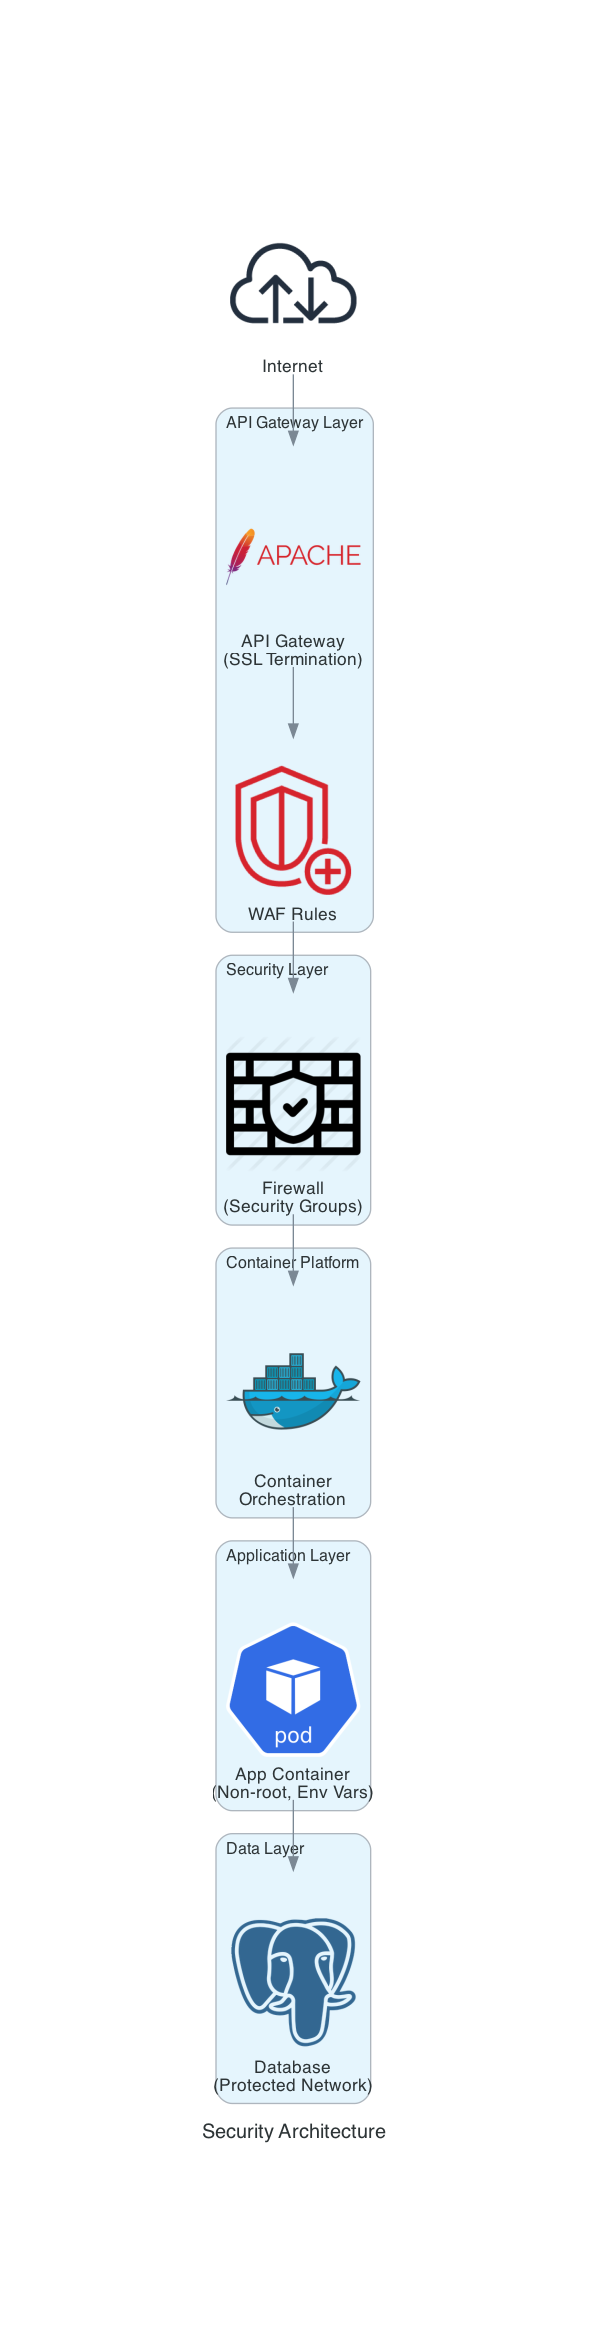

In [2]:
with Diagram("Security Architecture", filename="architecture_diagram", show=False, direction="TB"):
    internet = Internet("Internet")
    
    with Cluster("API Gateway Layer"):
        api_gateway = Apache("API Gateway\n(SSL Termination)")
        waf = ShieldAdvanced("WAF Rules")
    
    with Cluster("Security Layer"):
        firewall = Firewall("Firewall\n(Security Groups)")
    
    with Cluster("Container Platform"):
        orchestrator = Docker("Container\nOrchestration")
    
    with Cluster("Application Layer"):
        app_container = Pod("App Container\n(Non-root, Env Vars)")
    
    with Cluster("Data Layer"):
        database = PostgreSQL("Database\n(Protected Network)")
    
    # Connect components
    internet >> api_gateway >> waf >> firewall >> orchestrator >> app_container >> database
    
    # Display the diagram
from IPython.display import Image
Image(filename="architecture_diagram.png")

## Recording and Github Repo

Recording Link: https://drive.google.com/file/d/1fznfByZp0v5T31mM0u_vheJoI7JExTzb/view?usp=drive_link

## Summary Report



---
# Cybersecurity Architect: Securing a Containerized Application


In this security assessment, we identified five critical vulnerabilities in the original Flask application: command injection in the `/ping` endpoint allowing arbitrary OS commands through unsanitized user input, code execution vulnerability in the `/calculate` endpoint using the dangerous `eval()` function, hard-coded credentials stored in source code, insufficient input validation in the root route that only checked alphanumeric characters, and insecure configuration running on all interfaces without TLS/HTTPS.

We tested the application endpoints (`/`, `/ping?ip=8.8.8.8`, and `/calculate?expr=2+3`) and conducted security scanning using `make check`, `make scan`, and `make host-security` commands. Initial scans revealed multiple vulnerabilities and misconfigurations that required immediate attention.

To remediate these issues, we created an improved version that implements proper input validation, replaces command injection-vulnerable code with safer alternatives using argument arrays instead of shell execution, eliminates the dangerous `eval()` function by replacing it with `ast.literal_eval()`, moves credentials to environment variables managed through `.env` files, adds logging and error handling, and includes better configuration management with environment-based settings and a health check endpoint. Due to macOS compatibility issues, we maintained the original interface binding configuration to prevent connectivity loss, though we attempted to restrict Flask to localhost where possible.
We then retested the secured applications against the endpoints and got the expected results. 
With results from our `make scan` and `make check` we were able to apply some of the suggested controls.

We secured the containerized application using a minimal base image (python:3.13-alpine), ensuring the app runs as a non-root user with proper `HEALTHCHECK` directives. The Dockerfile was enhanced with multi-stage builds where applicable to reduce attack surface. The docker-compose.yml was hardened with read-only filesystems, security options, memory limits, process limits, and port exposure restricted to `127.0.0.1`.

After resolving macOS-specific issues with the security script (which attempted to modify Linux-specific paths unavailable on Docker Desktop for Mac), we implemented iterative security improvements: updating Docker daemon settings, implementing read-only filesystems, binding ports to localhost only, and enabling Docker Content Trust. These measures improved the Docker Bench for Security score from 6 to 25 by configuring memory limits, CPU shares, process limits, and security options like no-new-privileges.

We then performed comprehensive threat modeling using STRIDE analysis, mapped vulnerabilities using MITRE ATT&CK for Containers to identify relevant techniques, and aligned findings with NIST 800-53 controls. The threat analysis was documented in `deliverables/threat_model.md`. An architectural diagram showing the hardened application infrastructure was generated and saved as `deliverables/architecture_diagram.png`. The auto-hardening Python script (`docker_security_fixes.py`) was developed to automatically update `daemon.json` with hardening flags and inject security configurations into Dockerfile and Compose files.